Đề tài: Hiệu suất và ứng dụng của Decision Tree, Naive Bayes và Linear Regression trong phân loại khách hàng thẻ tín dụng

Nhóm SVTH:
    Lê Nguyễn Minh Trung - 19521061,
    Võ Nữ Diễm Trang - 20521013,
    Trần Gia Phong - 20521748

In [1]:
#Import các thư viện cần thiết
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.lines as mlines

In [2]:
#Đọc tập tin dữ liệu
#Thầy có thể lấy dữ liệu từ link drive: https://drive.google.com/drive/folders/1Nzop-r37_0KJArbOpJLg8rzef2GxON1r?usp=drive_link
df = pd.read_csv('/TH_DataMining/Lab03/Dataset/BankChurners.csv')

In [3]:
#Loại bỏ các cột thuộc tính không liên quan
df = df.drop('CLIENTNUM', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

C:\Users\pc\AppData\Local\Temp\ipykernel_9804\2078894571.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True)


<Axes: >

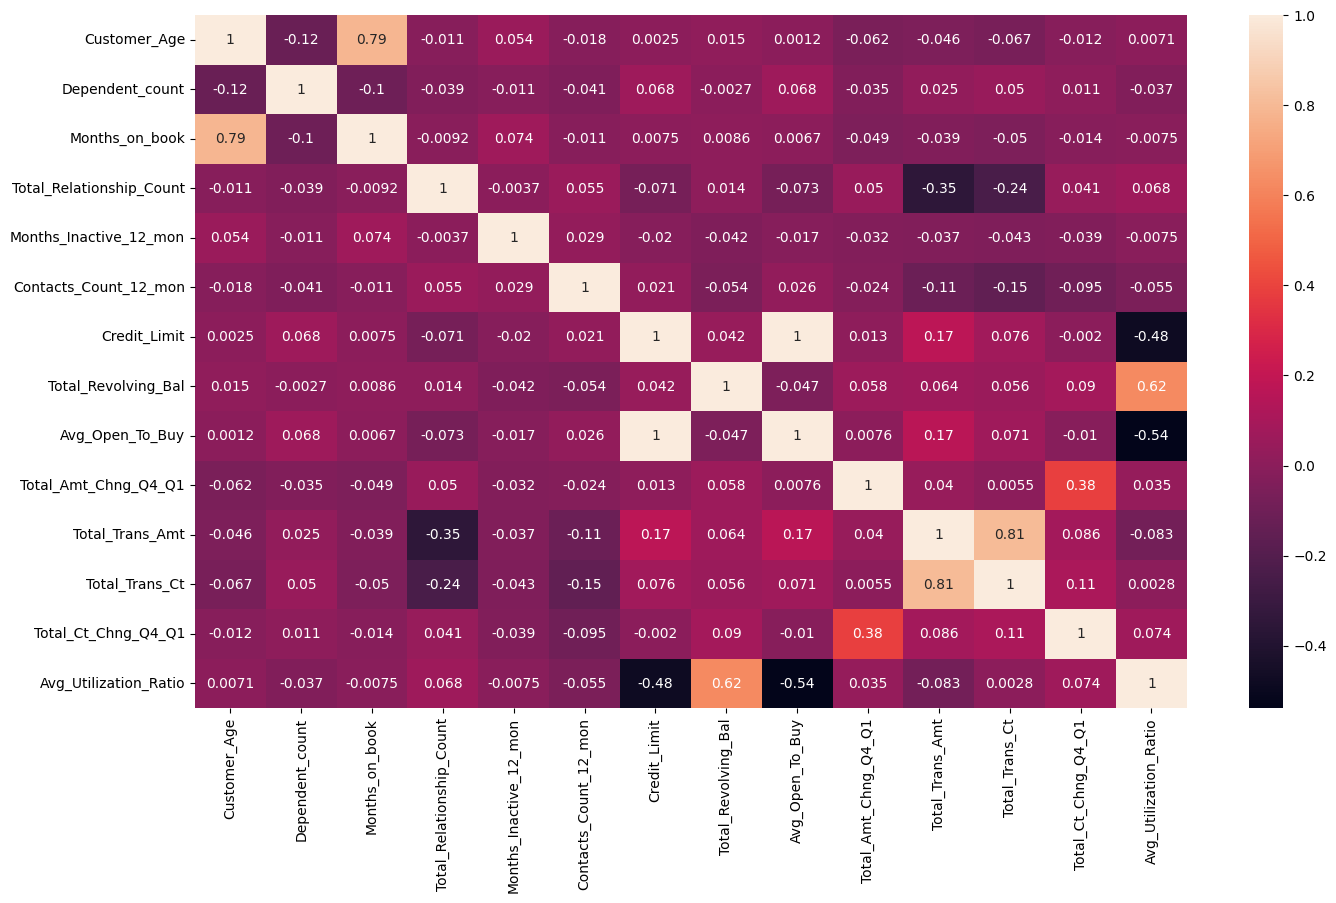

In [13]:
# Khảo sát độ tương đương đồng của các cột
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [14]:
df.shape

(10127, 20)

In [15]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [16]:
df.info

<bound method DataFrame.info of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Singl

In [17]:
#Checking for null values 
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

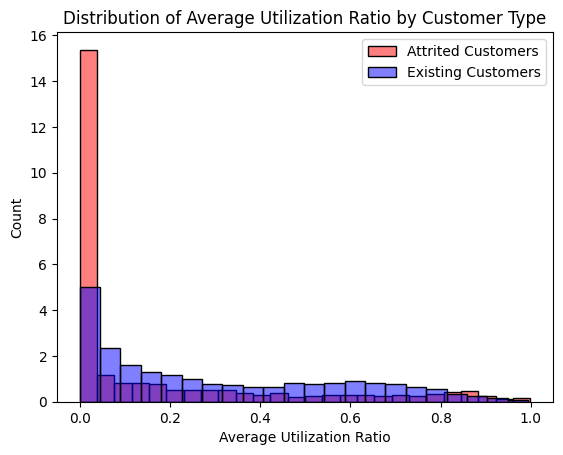

In [20]:
# Filter data for existing customers and attrited customers
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Create a histogram to compare the distributions
#used stat as density as we have huge difference in the number of exsisting customers and atrrited customers 

sns.histplot(attrited_customers['Avg_Utilization_Ratio'], label='Attrited Customers', color='red', alpha=0.5,stat='density')
sns.histplot(existing_customers['Avg_Utilization_Ratio'], label='Existing Customers', color='blue', alpha=0.5,stat='density')

# Set labels and title
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Count')
plt.title('Distribution of Average Utilization Ratio by Customer Type')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [18]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [5]:
# Xác định các thuộc tính chứa giá trị "unknown"
unknown_columns = ['Marital_Status', 'Education_Level', 'Income_Category']

# Xác định thuộc tính quyết định
decision_column = 'Attrition_Flag'

# Lặp qua từng thuộc tính chứa giá trị "unknown"
for column in unknown_columns:
    # Tạo một DataFrame tạm thời chứa giá trị không rỗng và không phải "unknown"
    temp_df = df[df[column] != 'Unknown']
    
    # Tạo một Series với giá trị xuất hiện nhiều nhất trong thuộc tính, dựa trên thuộc tính quyết định
    most_frequent_value = temp_df.groupby(decision_column)[column].apply(lambda x: x.mode()[0])
    
    # Tạo một dictionary để ánh xạ giá trị "unknown" thành giá trị xuất hiện nhiều nhất
    replace_dict = dict(zip(most_frequent_value.index, most_frequent_value.values))
    
    # Thay thế giá trị "unknown" bằng giá trị xuất hiện nhiều nhất
    df[column] = np.where(df[column] == 'Unknown', df[decision_column].map(replace_dict), df[column])

In [6]:
#Chuyển các thuộc tính về dạng one-hot vector
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender','Card_Category','Income_Category','Education_Level','Marital_Status'])
one_hot_encoded_data

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_Less than $40K,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,0,1,0,0,0,1,0
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,1,0,0,0,0,0,1
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,0,0,1,0
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,1,0,0,0,1,0
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,0,0,1,0,0,0,0,0,1
10123,Attrited Customer,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,0,1,0,0,0,1,0,0
10124,Attrited Customer,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,1,0,0,0,1,0
10125,Attrited Customer,30,2,36,4,3,3,5281.0,0,5281.0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# Split the data into training, testing, and validation sets
x = one_hot_encoded_data.drop('Attrition_Flag', axis='columns')
y = one_hot_encoded_data['Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

Thực hiện giải thuật Decision Tree

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
#Predict the response for test dataset
tree_pred = clf.predict(x_test)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.9387956564659428
Report:                    precision    recall  f1-score   support

Attrited Customer       0.84      0.80      0.82       351
Existing Customer       0.96      0.97      0.96      1675

         accuracy                           0.94      2026
        macro avg       0.90      0.89      0.89      2026
     weighted avg       0.94      0.94      0.94      2026



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.9387956564659428')

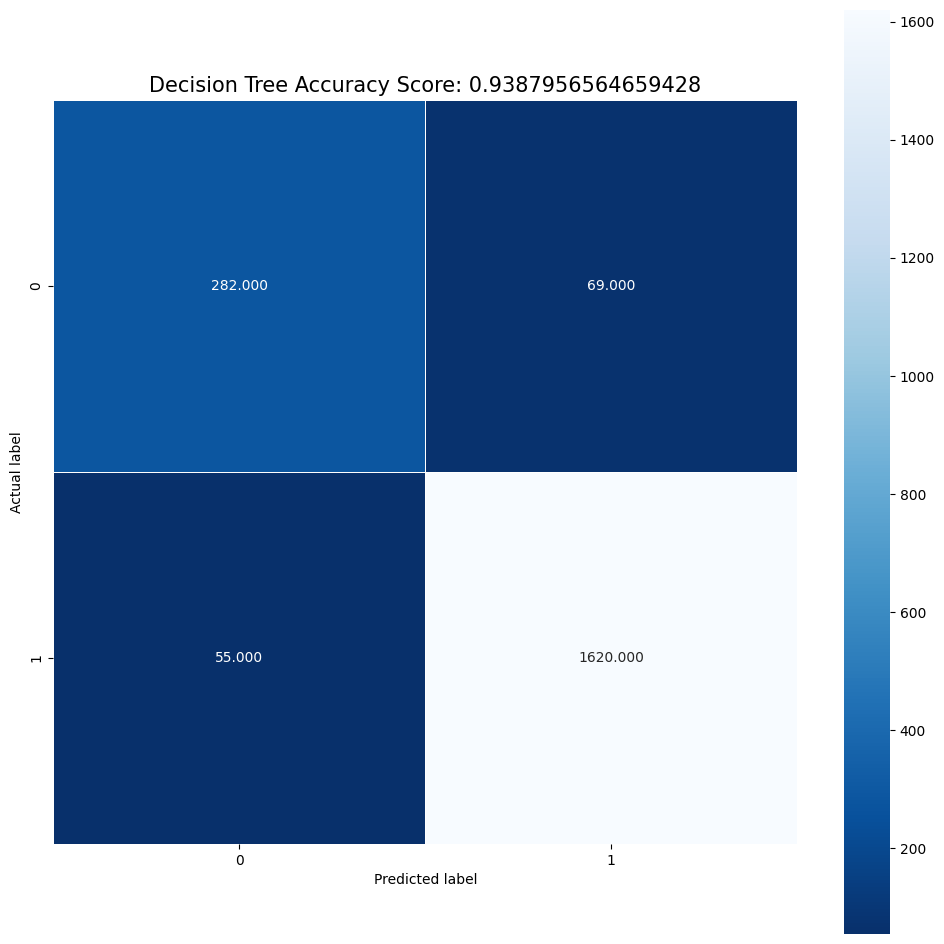

In [10]:
#Tính ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
#Biểu diễn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size=15)

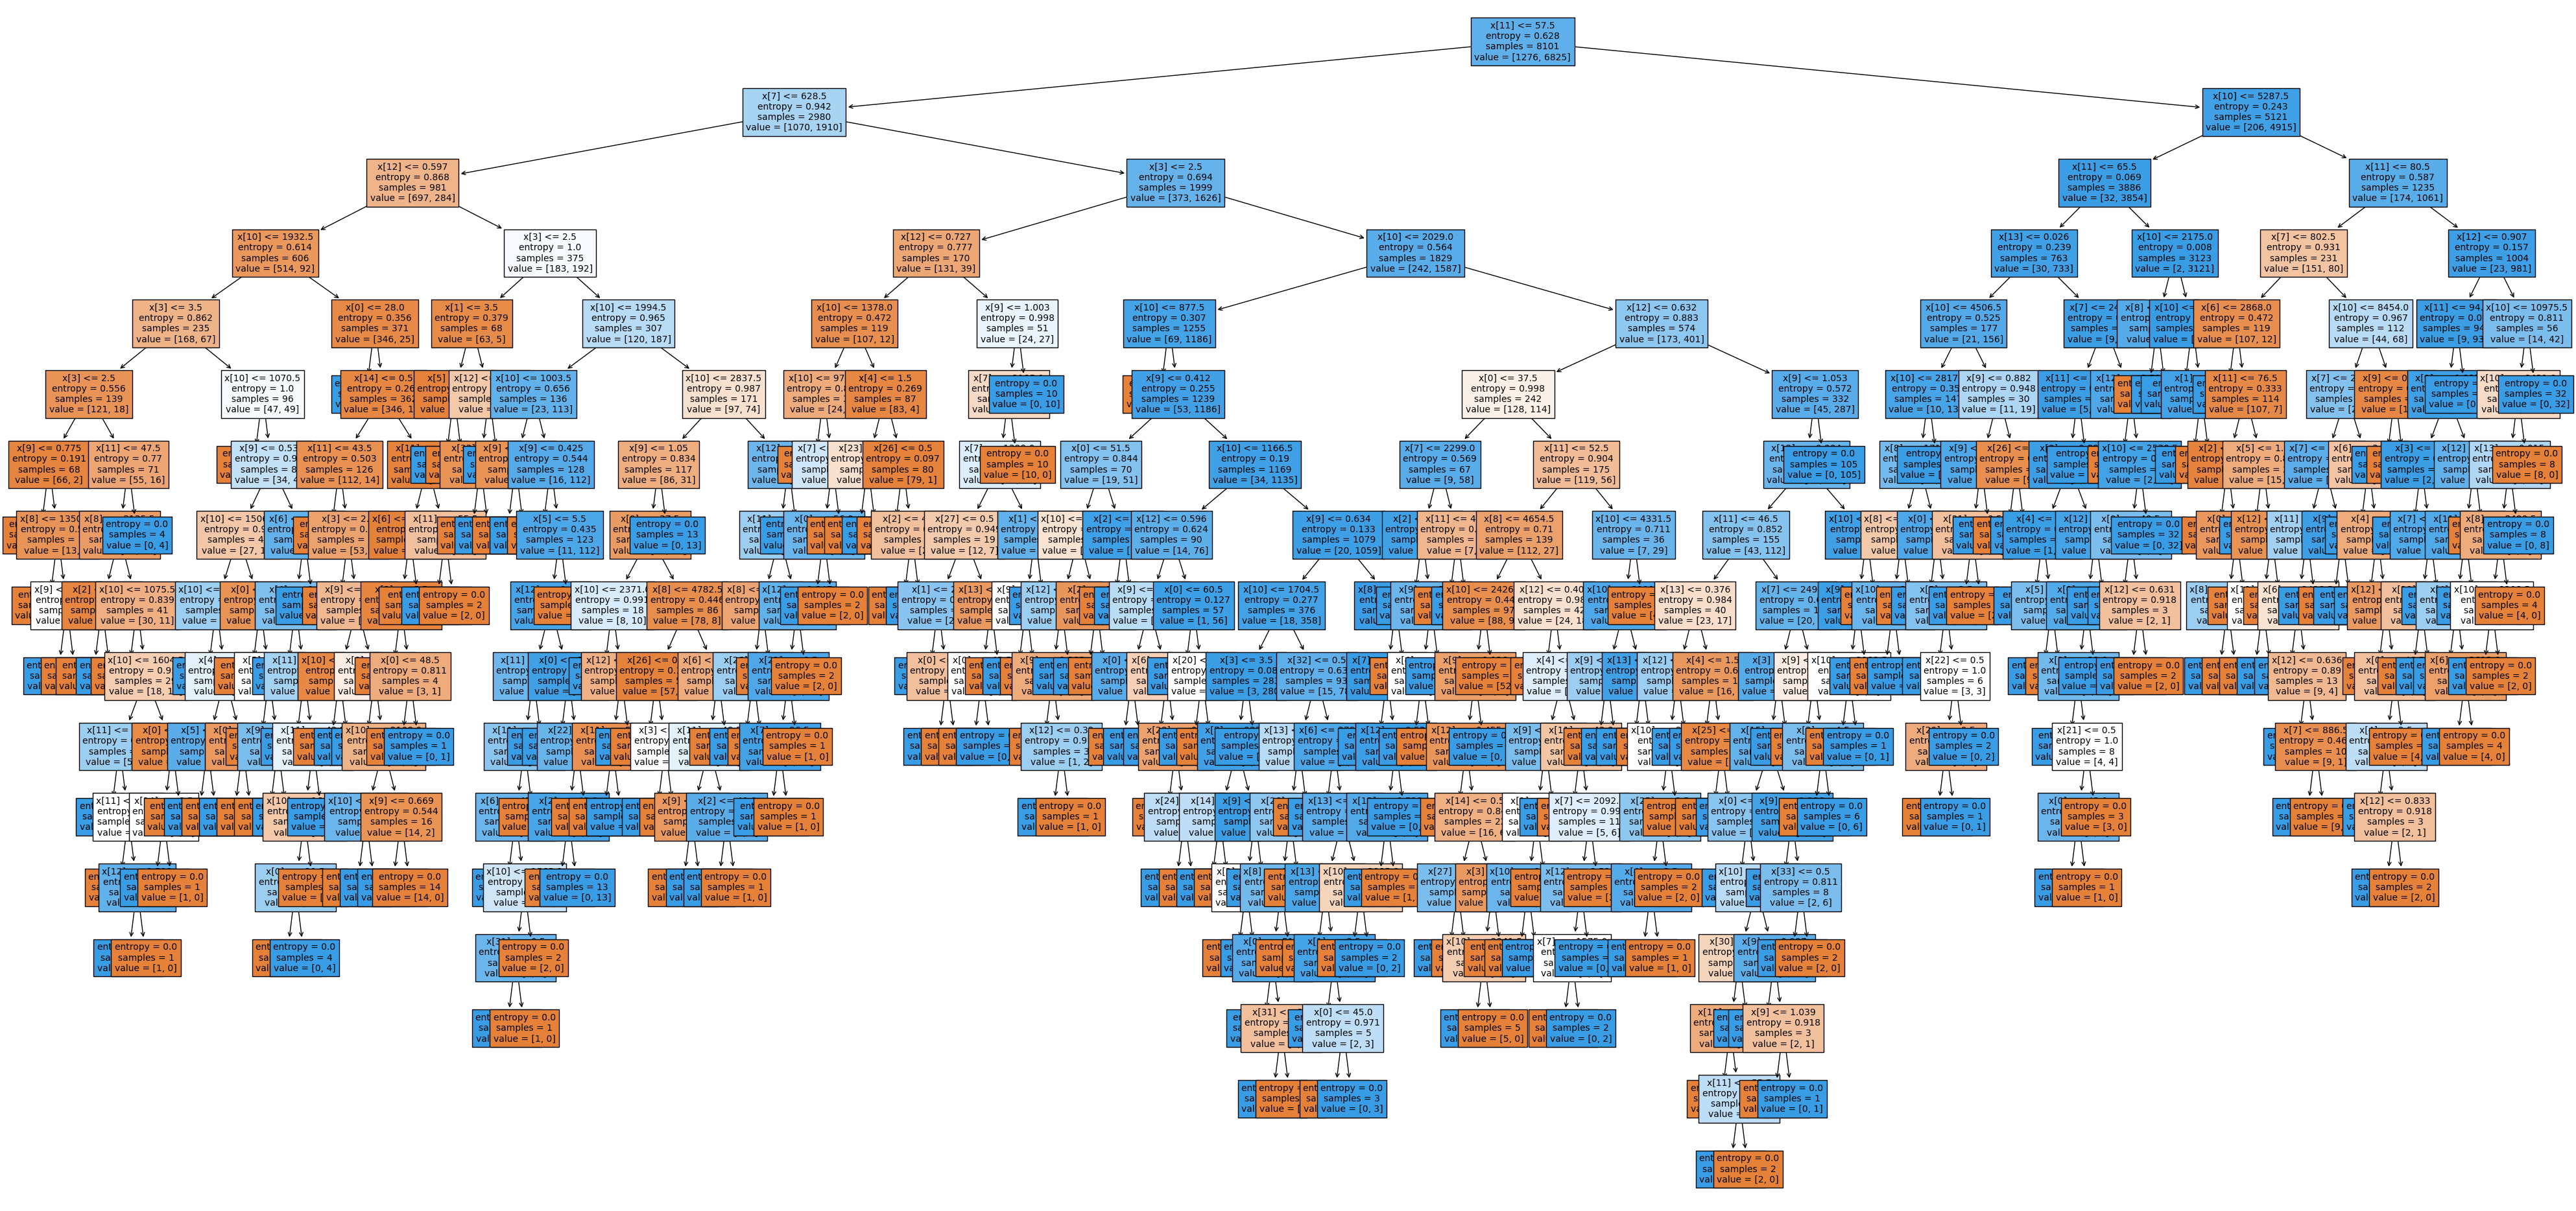

In [21]:
#Biểu diễn cây ID3
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

Thực hiện giải thuật Naive Bayes

In [22]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train, y_train).predict(x_test)

In [23]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.8933859822309971
Report:                    precision    recall  f1-score   support

Attrited Customer       0.73      0.62      0.67       351
Existing Customer       0.92      0.95      0.94      1675

         accuracy                           0.89      2026
        macro avg       0.82      0.78      0.80      2026
     weighted avg       0.89      0.89      0.89      2026



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.8933859822309971')

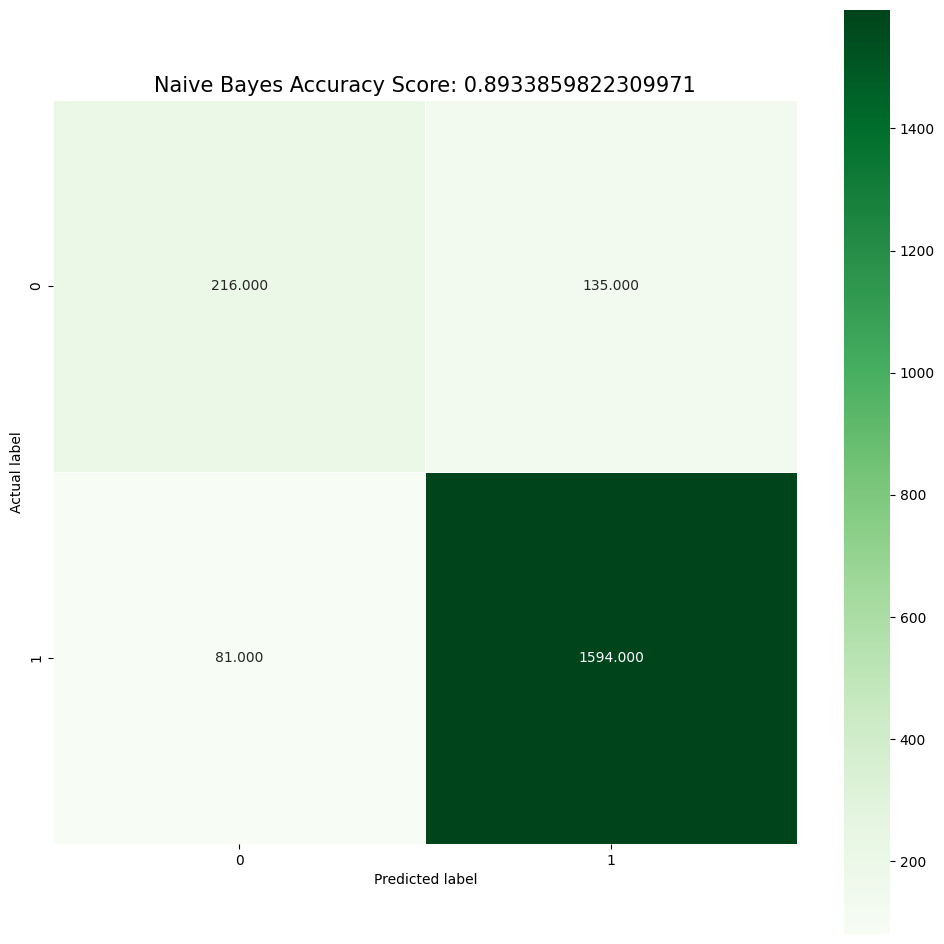

In [25]:
#Biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)

Thực hiện giải thuật Linear Regression

In [35]:
one_hot_encoded_data['Attrition_Flag'] = one_hot_encoded_data['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [36]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(one_hot_encoded_data))
test_size = int(0.2 * len(one_hot_encoded_data))

train_data = one_hot_encoded_data[:train_size]
test_data = one_hot_encoded_data[train_size:train_size+test_size]

In [38]:
# Quá trình Training
x_train2 = np.array(train_data.index).reshape(-1, 1)
y_train2 = np.array(train_data['Attrition_Flag'])

In [39]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train2, y_train2)

LinearRegression()

In [41]:
# Quá trình testing 
x_test2 = np.array(test_data.index).reshape(-1, 1)
y_test2 = np.array(test_data['Attrition_Flag'])
y_pred = linear_model.predict(x_test2)

In [42]:
lr_pred=linear_model.fit(x_train2, y_train2).predict(x_test2)

In [44]:
# Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test2)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 0.4041718592912714


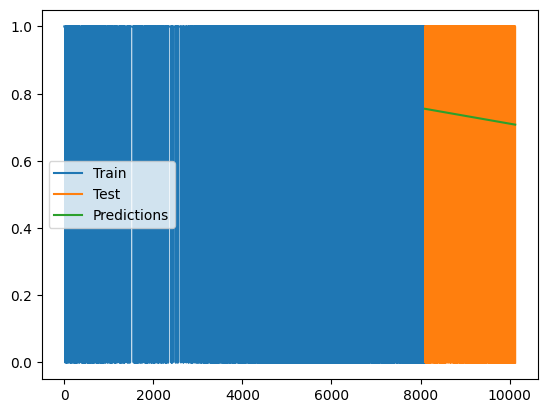

In [45]:
# Vẽ biểu đồ
plt.plot(train_data['Attrition_Flag'])
plt.plot(test_data['Attrition_Flag'])
plt.plot(test_data.index, y_pred)
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

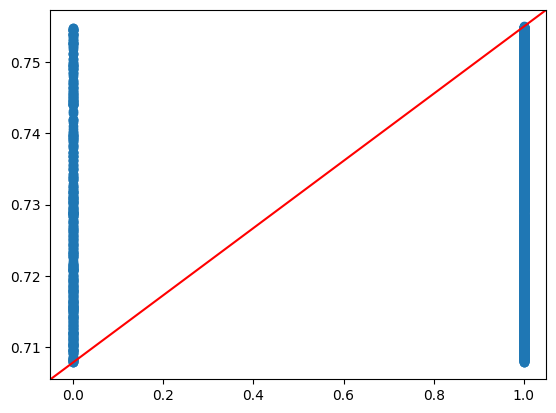

In [49]:
#Vẽ biểu đồ phân tán
fig, ax = plt.subplots()
ax.scatter(y_test2, y_pred)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [50]:
#Tính các chỉ số:
MSE = mean_squared_error(y_train2, linear_model.predict(x_train2))
MAE = mean_absolute_error(y_train2, linear_model.predict(x_train2))
R2 = r2_score(y_train2, linear_model.predict(x_train2))

print(MSE, MAE, R2)

0.12513324607705423 0.2502664921541084 0.023092464240389243


Một số thông số khác

In [11]:
X_c = one_hot_encoded_data.drop('Attrition_Flag', axis=1)

In [12]:
#Các tính năng quan trọng của mô hình cây quyết định
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_c.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)

                           Feature  Importance
11                  Total_Trans_Ct    0.323065
10                 Total_Trans_Amt    0.176928
7              Total_Revolving_Bal    0.143473
12             Total_Ct_Chng_Q4_Q1    0.078172
3         Total_Relationship_Count    0.070884
9             Total_Amt_Chng_Q4_Q1    0.059871
0                     Customer_Age    0.044474
8                  Avg_Open_To_Buy    0.014788
6                     Credit_Limit    0.012678
13           Avg_Utilization_Ratio    0.012272
4           Months_Inactive_12_mon    0.010909
2                   Months_on_book    0.010238
5            Contacts_Count_12_mon    0.007681
1                  Dependent_count    0.006206
14                        Gender_F    0.004916
26       Education_Level_Doctorate    0.004244
21     Income_Category_$40K - $60K    0.002164
33           Marital_Status_Single    0.002129
25         Education_Level_College    0.001955
22     Income_Category_$60K - $80K    0.001709
32          M

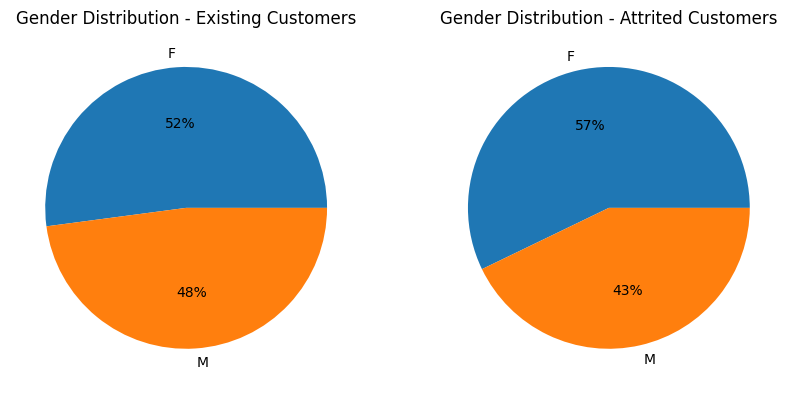

In [13]:
# Count the gender distribution for existing customers
existing_gender = df[df['Attrition_Flag'] == 'Existing Customer']['Gender'].value_counts()

# Count the gender distribution for attrited customers
attrited_gender = df[df['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts()

# Create the figure and axes for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart for existing customers
ax1.pie(existing_gender, labels=existing_gender.index, autopct='%1.f%%')
ax1.set_title('Gender Distribution - Existing Customers')

# Plot the second pie chart for attrited customers
ax2.pie(attrited_gender, labels=attrited_gender.index, autopct='%1.f%%')
ax2.set_title('Gender Distribution - Attrited Customers')

# Show the pie charts
plt.show()